In [ ]:
#logistic regression algorithm----------------------------

(200, 6)
              Age      Tenure  MonthlyCharges       Churn
count  200.000000  200.000000        200.0000  200.000000
mean    44.405000   36.670000         84.4850    0.290000
std     15.353816   20.285676         36.9646    0.454901
min     18.000000    1.000000         20.0000    0.000000
25%     32.750000   19.000000         53.7500    0.000000
50%     46.000000   35.000000         83.0000    0.000000
75%     56.000000   55.000000        114.2500    1.000000
max     69.000000   70.000000        148.0000    1.000000
     CustomerID  Gender    Age  Tenure  MonthlyCharges  Churn
0         False   False  False   False           False  False
1         False   False  False   False           False  False
2         False   False  False   False           False  False
3         False   False  False   False           False  False
4         False   False  False   False           False  False
..          ...     ...    ...     ...             ...    ...
195       False   False  False   Fa

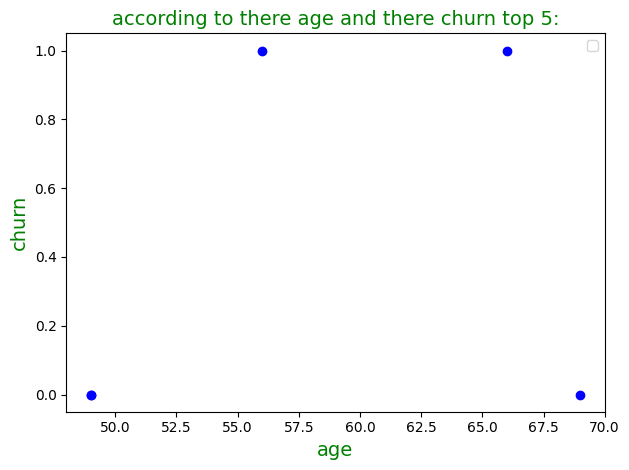

accuracy_score: 0.675
precision_score: 0.0
    Actual  Prediction  y_pred_prob
56       0           0     0.255001
37       0           0     0.298607
67       1           0     0.326534
79       0           0     0.248009
80       0           0     0.339600
log_loss: 0.6331674857387914


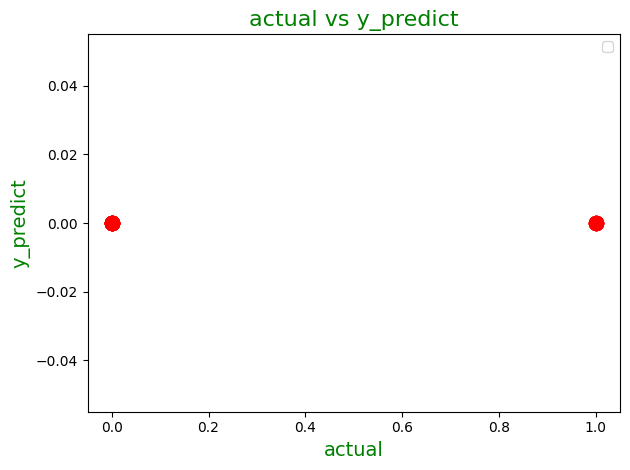

customer_churn.pkl


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')
import joblib

#step:1------------------------------------
#loading data_set--------------------------

df = pd.read_csv(r"C:\Users\indur\Downloads\telecom_churn_sample.csv")
df

#step:2-----------
#EDA------------

print(df.shape)
print(df.describe())
print(df.isnull())
print(df.head())


#step:3------------
#visualization------

cal = df.head()
cal

plt.scatter(cal['Age'],cal['Churn'],color = 'blue')
plt.title('according to there age and there churn top 5:',color = 'green',fontsize = '14')
plt.xlabel('age',color = 'green',fontsize = '14')
plt.ylabel('churn',color = 'green',fontsize = '14')
plt.legend()
plt.tight_layout()
plt.show()

#step:4
# data cleaing 
df = df.dropna(subset = ['Age','Tenure','MonthlyCharges'])
df = df.drop_duplicates()

#step:5
#conerting to string to number

label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])

#step:6
#features is x and target is y:

x = df[['Gender','Age','Tenure','MonthlyCharges']]
y = df['Churn']

#step:7
#scaling values :
standard = StandardScaler()
x_sac = standard.fit_transform(x)

#step:8
#train_test_split :

x_train,x_test,y_train,y_test = train_test_split(x_sac,y,test_size = 0.2,random_state=43)

#step 9:
#model

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred_prob

#step 10:
#metrics :

print('accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))

#step 11:
#actual vs y_predict:

result = pd.DataFrame({
    'Actual':y_test,
    'Prediction':y_pred,
    'y_pred_prob':y_pred_prob
})

print(result.head())

#step 12:

print('log_loss:',log_loss(y_test,y_pred_prob))

#visualization-----
#actual vs y_predict
plt.scatter(result['Actual'],result['Prediction'],color = 'red',s = 100)
plt.xlabel('actual', color='green', fontsize=14)
plt.ylabel('y_predict', color='green', fontsize=14)
plt.title('actual vs y_predict', fontsize=16,color = 'green')
plt.tight_layout()
plt.legend()
plt.show()

#step 13:
#saveing 
joblib.dump(model,'customer_churn.pkl')

print('customer_churn.pkl')